<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/Time_series_forecasting_eth_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import helper-functions file
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py

--2021-09-02 08:31:15--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3742 (3.7K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   3.65K  --.-KB/s    in 0s      

2021-09-02 08:31:15 (52.1 MB/s) - ‘helper_functions.py’ saved [3742/3742]



In [2]:
#Download ETH dataset
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/ETH_Coindesk.csv

--2021-09-02 08:31:16--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/ETH_Coindesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115669 (113K) [text/plain]
Saving to: ‘ETH_Coindesk.csv’

ETH_Coindesk.csv    100%[===================>] 112.96K  --.-KB/s    in 0.02s   

2021-09-02 08:31:16 (4.45 MB/s) - ‘ETH_Coindesk.csv’ saved [115669/115669]



In [3]:
#Import Data
import pandas as pd
df = pd.read_csv("/content/ETH_Coindesk.csv", parse_dates=["Date"], index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2016-12-15,ETH,8.195936,8.394537,8.440725,8.044697
2016-12-16,ETH,7.836525,8.195936,8.206139,7.694463
2016-12-17,ETH,7.709642,7.836525,7.892591,7.699776
2016-12-18,ETH,7.813304,7.709642,7.939579,7.495653
2016-12-19,ETH,7.735086,7.813304,7.926575,7.690697


In [4]:
#Get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1706 entries, 2016-12-15 to 2021-08-31
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             1706 non-null   object 
 1   Closing Price (USD)  1706 non-null   float64
 2   24h Open (USD)       1706 non-null   float64
 3   24h High (USD)       1706 non-null   float64
 4   24h Low (USD)        1706 non-null   float64
dtypes: float64(4), object(1)
memory usage: 80.0+ KB


In [5]:
#How many samples in the datset
len(df)

1706

In [6]:
#Use only the ETH closing price and rename columns
ether_price = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
ether_price.head()

,Price
Date,
2016-12-15,8.195936
2016-12-16,7.836525
2016-12-17,7.709642
2016-12-18,7.813304
2016-12-19,7.735086


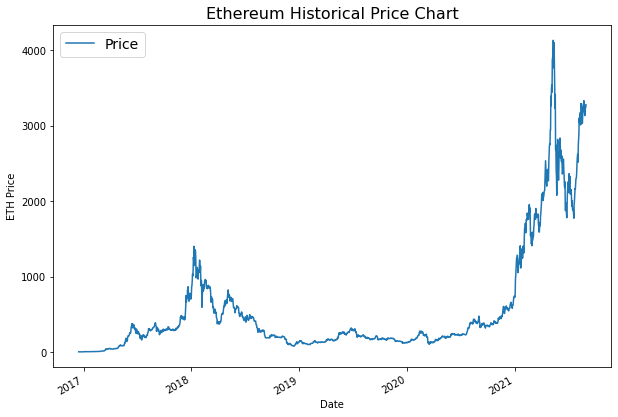

In [7]:
#Plot Ether price
import matplotlib.pyplot as plt
ether_price.plot(figsize=(10,7))
plt.ylabel("ETH Price")
plt.title("Ethereum Historical Price Chart", fontsize=16)
plt.legend(fontsize=14)

In [8]:
#Get ETH price and date array
timesteps = ether_price.index.to_numpy()
prices = ether_price["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2016-12-15T00:00:00.000000000', '2016-12-16T00:00:00.000000000',
        '2016-12-17T00:00:00.000000000', '2016-12-18T00:00:00.000000000',
        '2016-12-19T00:00:00.000000000', '2016-12-20T00:00:00.000000000',
        '2016-12-21T00:00:00.000000000', '2016-12-22T00:00:00.000000000',
        '2016-12-23T00:00:00.000000000', '2016-12-24T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([8.195936, 7.836525, 7.709642, 7.813304, 7.735086, 7.601047,
        7.675313, 7.569866, 7.601819, 7.221961]))

In [9]:
#Reshape the data for further data preprocessing
prices = prices.reshape(-1, 1)
print(prices.shape)
print(prices[:10])

(1706, 1)
[[8.195936]
 [7.836525]
 [7.709642]
 [7.813304]
 [7.735086]
 [7.601047]
 [7.675313]
 [7.569866]
 [7.601819]
 [7.221961]]


## Data Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)
scaled_prices[:10]

array([[2.36084499e-04],
       [1.48965871e-04],
       [1.18210349e-04],
       [1.43337268e-04],
       [1.24377790e-04],
       [9.18877058e-05],
       [1.09889247e-04],
       [8.43296568e-05],
       [9.20748330e-05],
       [0.00000000e+00]])

In [11]:
#Reshape data for dataset preparation
import numpy as np
scaled_prices = np.squeeze(scaled_prices, axis=1)
scaled_prices

array([2.36084499e-04, 1.48965871e-04, 1.18210349e-04, ...,
       7.81681327e-01, 7.84144558e-01, 7.93397410e-01])

In [12]:
#Is data between 0 and 1?
print(f"Max value in array: {np.max(scaled_prices)}")
print(f"Min value in array: {np.min(scaled_prices)}")

Max value in array: 1.0
Min value in array: 0.0


No handles with labels found to put in legend.


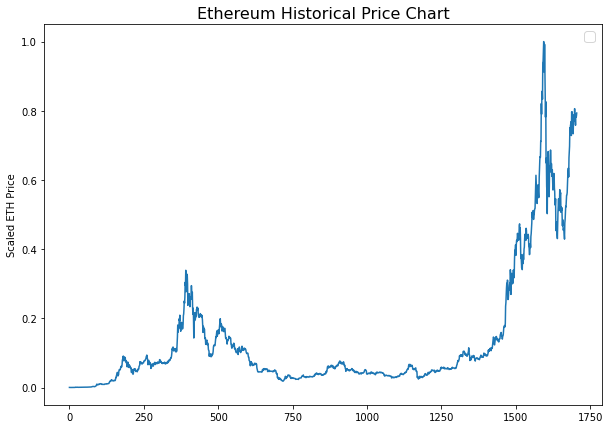

In [13]:
#Check graphical if all data is between 0 and 1
plt.figure(figsize=(10,7))
plt.plot(scaled_prices)
plt.ylabel("Scaled ETH Price")
plt.title("Ethereum Historical Price Chart", fontsize=16)
plt.legend(fontsize=14)

## Dataset preparation 
Window the datasets with different window sizes and horizons and split it into train and test set.

In [14]:
from helper_functions import make_windows
# Make windowed data with different windows
windows_5, labels_5 = make_windows(scaled_prices, window_size=5, horizon=1)
windows_7, labels_7 = make_windows(scaled_prices, window_size=7, horizon=1)
windows_10, labels_10 = make_windows(scaled_prices, window_size=10, horizon=1)
windows_15, labels_15 = make_windows(scaled_prices, window_size=15, horizon=1)
windows_30, labels_30 = make_windows(scaled_prices, window_size=30, horizon=1)

In [15]:
from helper_functions import make_train_test_splits
# Make train and test splits of the windowed data
train_windows_5, test_windows_5, train_labels_5, test_labels_5 = make_train_test_splits(windows_5, labels_5)
train_windows_7, test_windows_7, train_labels_7, test_labels_7 = make_train_test_splits(windows_7, labels_7)
train_windows_10, test_windows_10, train_labels_10, test_labels_10 = make_train_test_splits(windows_10, labels_10)
train_windows_15, test_windows_15, train_labels_15, test_labels_15 = make_train_test_splits(windows_15, labels_15)
train_windows_30, test_windows_30, train_labels_30, test_labels_30 = make_train_test_splits(windows_30, labels_30)

# Modelling experiments

## Model 1: Dense model

In [96]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()}

In [17]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
model_1 = tf.keras.Sequential([
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1)
])

In [18]:
#Compile the model 
model_1.compile(loss="mse", optimizer="Adam", metrics=["mse", "mae"])

In [19]:
#Fit the model
history_model_1 = model_1.fit(train_windows_7, train_labels_7,
            epochs=100, 
            batch_size=128,
            verbose=0,
            validation_data=(test_windows_7, test_labels_7))

In [20]:
model_1.evaluate(test_windows_7, test_labels_7)

11/11 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0250    


[0.0013535511679947376, 0.0013535511679947376, 0.02497130259871483]

In [21]:
#Make predictions
model_1_preds = make_preds(model_1, test_windows_7)
model_1_results = evaluate_preds(tf.squeeze(test_labels_7),model_1_preds)
model_1_results

{'mae': 0.024971306,
 'mape': 5.283123,
 'mse': 0.0013535513,
 'rmse': 0.036790643}

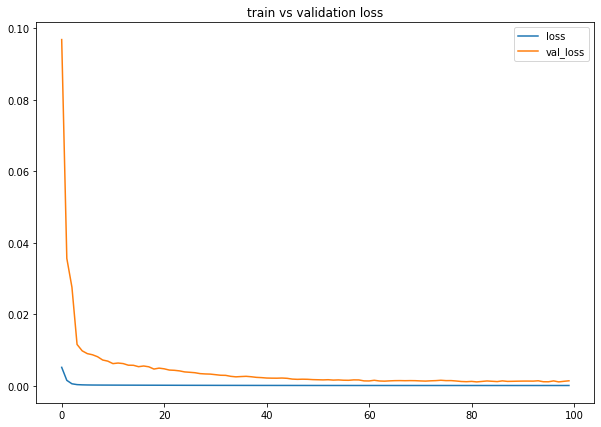

In [22]:
# Plot training curve
loss = history_model_1.history["loss"]
val_loss = history_model_1.history["val_loss"]

plt.figure(figsize=(10, 7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.title("train vs validation loss")
plt.legend()

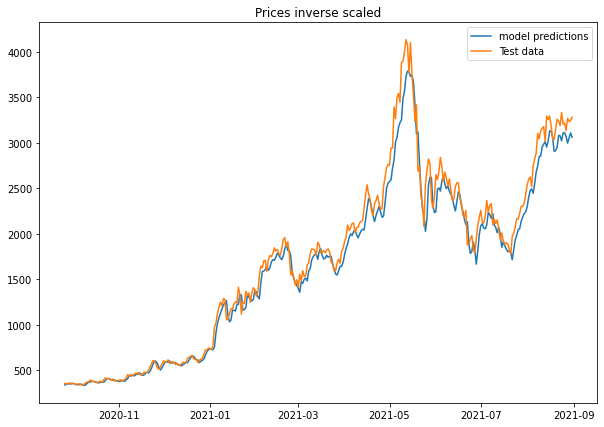

In [68]:
model_1_preds = model_1_preds.numpy()
model_1_preds = model_1_preds.reshape(-1, 1)
model_1_preds_rescaled = scaler.inverse_transform(model_1_preds)
plt.figure(figsize=(10,7))
plt.plot(timesteps[1366:].reshape(-1,1), model_1_preds_rescaled, label="model predictions")
plt.plot(timesteps[1366:].reshape(-1,1), prices[1366:], label="Test data")
plt.title("Prices inverse scaled")
plt.legend()

## Model 2: Conv1D 

In [23]:
tf.random.set_seed(42)

#Build the model 

model_2 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.Conv1D(filters=16, kernel_size=5, padding="causal", activation="relu"),
                               layers.Dense(1)
])

In [24]:
# Compile the model 
model_2.compile(loss="mse", optimizer="Adam", metrics=["mae", "mse"])

In [25]:
#Fit the model 
history_model_2 = model_2.fit(train_windows_7, train_labels_7,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows_7, test_labels_7))

In [26]:
#Evaluate
model_2.evaluate(test_windows_7, test_labels_7)

11/11 [==============================] - 0s 1ms/step - loss: 0.0017 - mae: 0.0277 - mse: 0.0017    


[0.001734694349579513, 0.02768920175731182, 0.001734694349579513]

In [27]:
#Make predictions
model_2_preds = make_preds(model_2, test_windows_7)
model_2_results = evaluate_preds(tf.squeeze(test_labels_7),model_2_preds)
model_2_results

{'mae': 0.027689198,
 'mape': 5.882169,
 'mse': 0.0017346943,
 'rmse': 0.041649662}

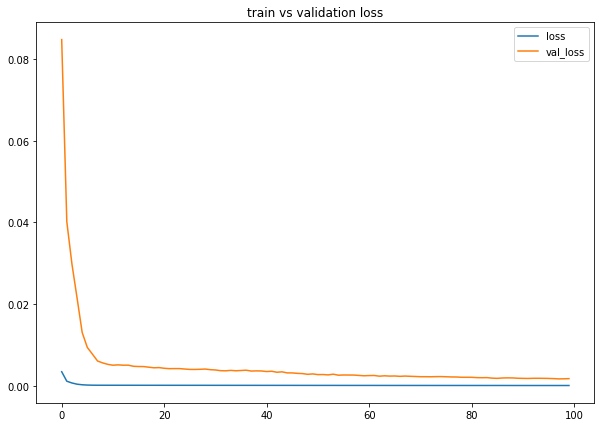

In [28]:
# Plot training curve
loss = history_model_2.history["loss"]
val_loss = history_model_2.history["val_loss"]

plt.figure(figsize=(10, 7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.title("train vs validation loss")
plt.legend()

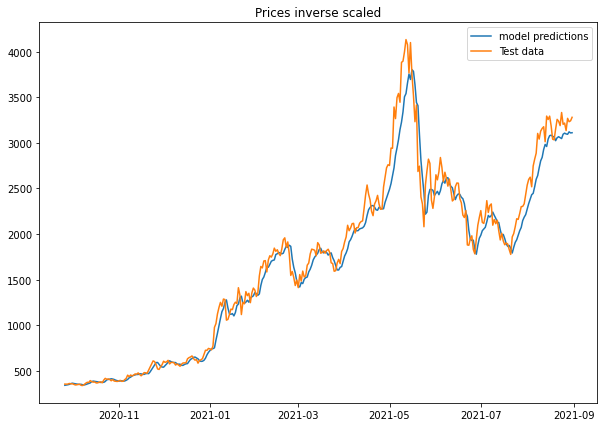

In [67]:
model_2_preds = model_2_preds.numpy()
model_2_preds = model_2_preds.reshape(-1, 1)
model_2_preds_rescaled = scaler.inverse_transform(model_2_preds)
plt.figure(figsize=(10,7))
plt.plot(timesteps[1366:].reshape(-1,1), model_2_preds_rescaled, label="model predictions")
plt.plot(timesteps[1366:].reshape(-1,1), prices[1366:], label="Test data")
plt.title("Prices inverse scaled")
plt.legend()

## Model 3: LSTM

In [29]:
tf.random.set_seed(42)

#Build the model 
model_3 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.LSTM(64, activation="tanh"),
                               layers.Dropout(0.1),
                               layers.Dense(1)
])

In [30]:
#Compile the model 
model_3.compile(loss="mse", optimizer="Adam", metrics=["mse", "mae"])

In [31]:
#Fit the model 
history_model_3 = model_3.fit(train_windows_7, train_labels_7,
                              epochs=100, 
                              batch_size=128, 
                              verbose=0,
                              validation_data=(test_windows_7, test_labels_7))

In [32]:
#Evaluate
model_3.evaluate(test_windows_7, test_labels_7)

11/11 [==============================] - 0s 2ms/step - loss: 9.2971e-04 - mse: 9.2971e-04 - mae: 0.0210


[0.0009297053329646587, 0.0009297053329646587, 0.021009504795074463]

In [33]:
#Make predictions
model_3_preds = make_preds(model_3, test_windows_7)
model_3_results = evaluate_preds(tf.squeeze(test_labels_7),model_3_preds)
model_3_results

{'mae': 0.021009505,
 'mape': 4.740677,
 'mse': 0.00092970533,
 'rmse': 0.030491069}

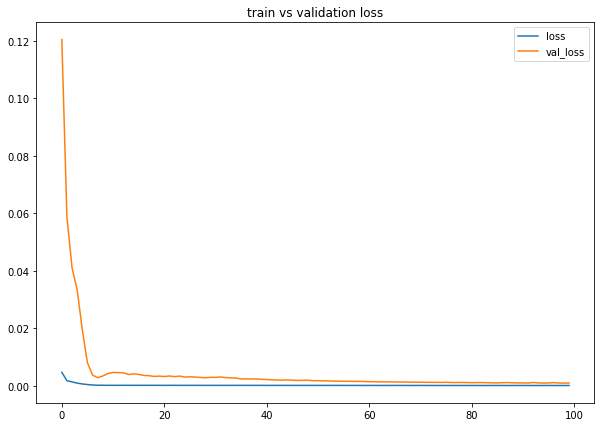

In [34]:
# Plot training curve
loss = history_model_3.history["loss"]
val_loss = history_model_3.history["val_loss"]

plt.figure(figsize=(10, 7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.title("train vs validation loss")
plt.legend()

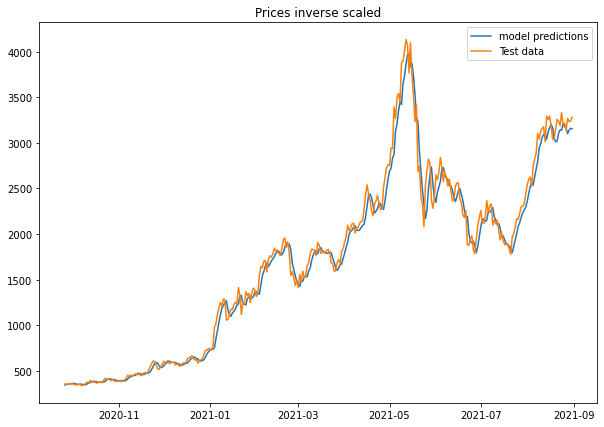

In [66]:
model_3_preds = model_3_preds.numpy()
model_3_preds = model_3_preds.reshape(-1, 1)
model_3_preds_rescaled = scaler.inverse_transform(model_3_preds)
plt.figure(figsize=(10,7))
plt.plot(timesteps[1366:].reshape(-1,1), model_3_preds_rescaled, label="model predictions")
plt.plot(timesteps[1366:].reshape(-1,1), prices[1366:], label="Test data")
plt.title("Prices inverse scaled")
plt.legend()

## Model 4: Bi-LSTM

In [59]:
tf.random.set_seed(42)

#Build the model 
model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.Bidirectional(layers.LSTM(64, activation="tanh")),
                               layers.Dense(1)
])

In [60]:
#Compile the model 
model_4.compile(loss="mae", optimizer="Adam", metrics=["mse", "mae"])

In [61]:
#Fit the model 
history_model_4 = model_4.fit(train_windows_7, train_labels_7,
                              epochs=100, 
                              batch_size=128, 
                              verbose=0,
                              validation_data=(test_windows_7, test_labels_7))

In [62]:
#Evaluate
model_4.evaluate(test_windows_7, test_labels_7)

11/11 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 8.0007e-04 - mae: 0.0184


[0.018356258049607277, 0.0008000697125680745, 0.018356258049607277]

In [63]:
#Make predictions
model_4_preds = make_preds(model_4, test_windows_7)
model_4_results = evaluate_preds(tf.squeeze(test_labels_7),model_4_preds)
model_4_results

{'mae': 0.018356262,
 'mape': 4.1628156,
 'mse': 0.0008000698,
 'rmse': 0.028285505}

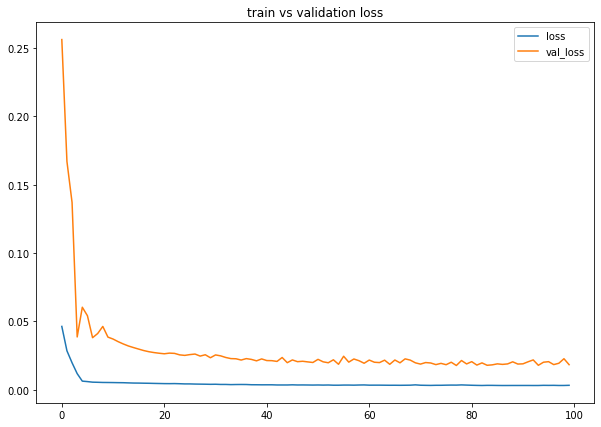

In [64]:
# Plot training curve
loss = history_model_4.history["loss"]
val_loss = history_model_4.history["val_loss"]

plt.figure(figsize=(10, 7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.title("train vs validation loss")
plt.legend()

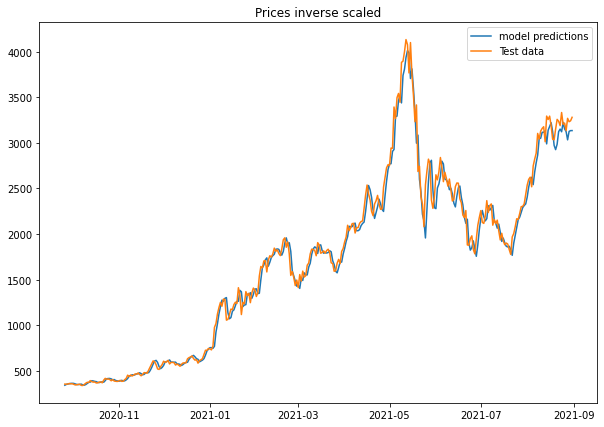

In [65]:
model_4_preds = model_4_preds.numpy()
model_4_preds = model_4_preds.reshape(-1, 1)
model_4_preds_rescaled = scaler.inverse_transform(model_4_preds)
plt.figure(figsize=(10,7))
plt.plot(timesteps[1366:].reshape(-1,1), model_4_preds_rescaled, label="model predictions")
plt.plot(timesteps[1366:].reshape(-1,1), prices[1366:], label="Test data")
plt.title("Prices inverse scaled")
plt.legend()

## Model 5: GRU

In [86]:
tf.random.set_seed(42)

#Build the model 
model_5 = tf.keras.Sequential([
                     layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                     layers.GRU(128, activation="tanh"),
                     layers.Dense(1)
])

In [87]:
#Compile the model 
model_5.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [88]:
#Fit the model 
history_model_5 = model_5.fit(train_windows_7, train_labels_7,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=(test_windows_7, test_labels_7))

In [89]:
#Evaluate
model_5.evaluate(test_windows_7, test_labels_7)

11/11 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0174 - mse: 7.1327e-04


[0.017413925379514694, 0.017413925379514694, 0.0007132737664505839]

In [90]:
#Make predictions
model_5_preds = make_preds(model_5, test_windows_7)
model_5_results = evaluate_preds(tf.squeeze(test_labels_7),model_5_preds)
model_5_results

{'mae': 0.017413925,
 'mape': 4.061189,
 'mse': 0.00071327377,
 'rmse': 0.026707185}

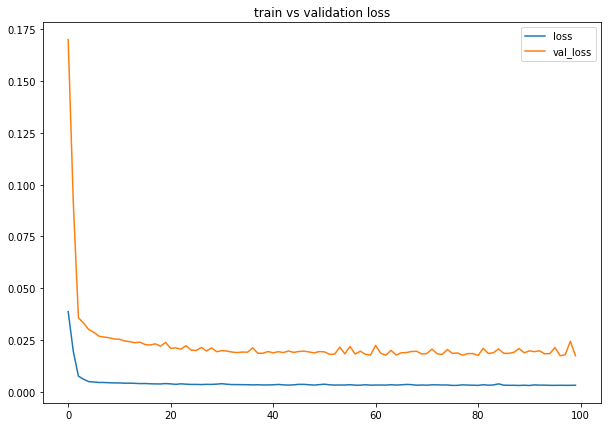

In [91]:
# Plot training curve
loss = history_model_5.history["loss"]
val_loss = history_model_5.history["val_loss"]

plt.figure(figsize=(10, 7))
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.title("train vs validation loss")
plt.legend()

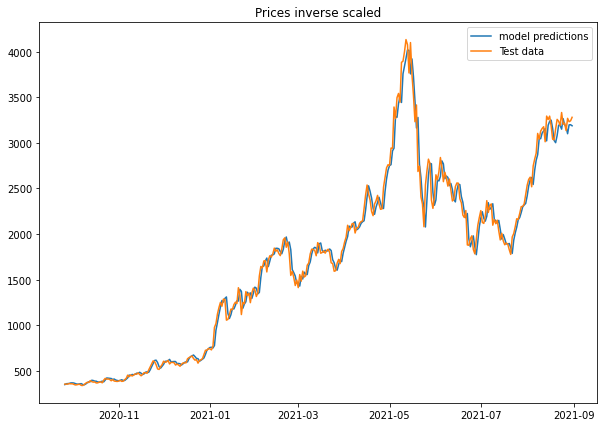

In [92]:
model_5_preds = model_5_preds.numpy()
model_5_preds = model_5_preds.reshape(-1, 1)
model_5_preds_rescaled = scaler.inverse_transform(model_5_preds)
plt.figure(figsize=(10,7))
plt.plot(timesteps[1366:].reshape(-1,1), model_5_preds_rescaled, label="model predictions")
plt.plot(timesteps[1366:].reshape(-1,1), prices[1366:], label="Test data")
plt.title("Prices inverse scaled")
plt.legend()

## Compare model results

In [94]:
model_results = pd.DataFrame({"model_1_dense": model_1_results,
                              "model_2_Conv1D": model_2_results,
                              "model_3_LSTM": model_3_results,
                              "model_4_Bi_LSTM": model_4_results,
                              "model_5_GRU": model_5_results}).T

model_results

,mae,mse,rmse,mape
model_1_dense,0.024971,0.001354,0.036791,5.283123
model_2_Conv1D,0.027689,0.001735,0.041650,5.882169
model_3_LSTM,0.021010,0.000930,0.030491,4.740677
model_4_Bi_LSTM,0.018356,0.000800,0.028286,4.162816
model_5_GRU,0.017414,0.000713,0.026707,4.061189


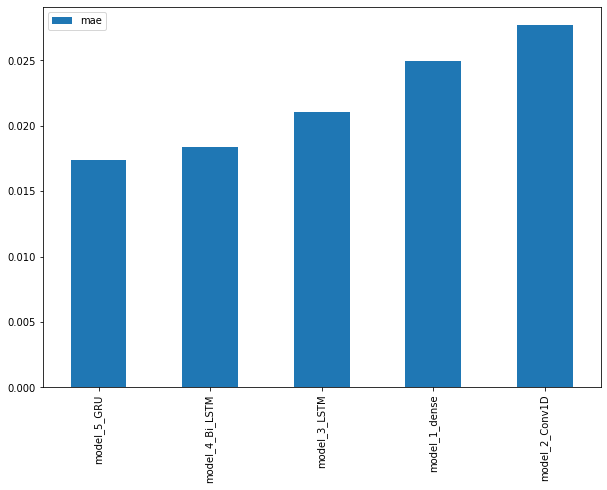

In [95]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind="bar")